In [ ]:
import random
import pickle

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


from extract_data import get_dataset

In [2]:
dataset = get_dataset()
x_data, y_data = dataset

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Either api or coformer not found. API= 1,2,4-thiadiazole derivative . Coformer= Vanillic acid
Either api or coformer not found. API= 4-cyanophenol . Coformer= 1,2-bis(4-dipyridyl)ethane
Either api or coformer not found. API= 4-cyanophenol . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= bicalutamide . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= Flurbiprofen . Coformer= 4,4'-ethylenebipyridine
Either api or coformer not found. API= Ibuprofen . Coformer= 4,4'-ethylenbipyridine
Either api or coformer not found. API= 3-cyanopyridin

In [3]:
n_components = 200
kernel='rbf'

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_data.iloc[:,:-2])

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

x_data_values = principal_components

y_data_values = y_data.iloc[:,:1]

random.seed(42)
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

In [5]:
svm_model = SVC(kernel=kernel)

# svm_model.fit(x_train, y_train) # To train the model
# with open('models/svm_model.pkl', 'wb') as f:
#     pickle.dump(svm_model, f)

with open('models/svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

y_pred = svm_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.780241935483871

In [6]:
accuracy_score(y_train, svm_model.predict(x_train))

0.8085858585858586

In [7]:
r = 10

print("Accuracy:", round(accuracy_score(y_test, y_pred),r))
print("Precision:", round(precision_score(y_test, y_pred),r))
print("Recall:", round(recall_score(y_test, y_pred),r))
print("F1-Score:", round(f1_score(y_test, y_pred),r))
print(classification_report(y_test, y_pred))

Accuracy: 0.7802419355
Precision: 0.7384615385
Recall: 0.8240343348
F1-Score: 0.7789046653
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       263
           1       0.74      0.82      0.78       233

    accuracy                           0.78       496
   macro avg       0.78      0.78      0.78       496
weighted avg       0.79      0.78      0.78       496



Confusion Matrix:
[[195  68]
 [ 41 192]]


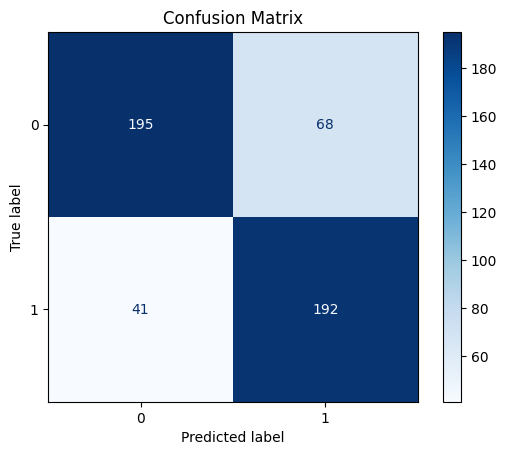

In [8]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()